<a href="https://colab.research.google.com/github/Giandonn/Machine-Learning/blob/main/trab_aula_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Valores nulos por coluna:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Estatísticas descritivas:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0

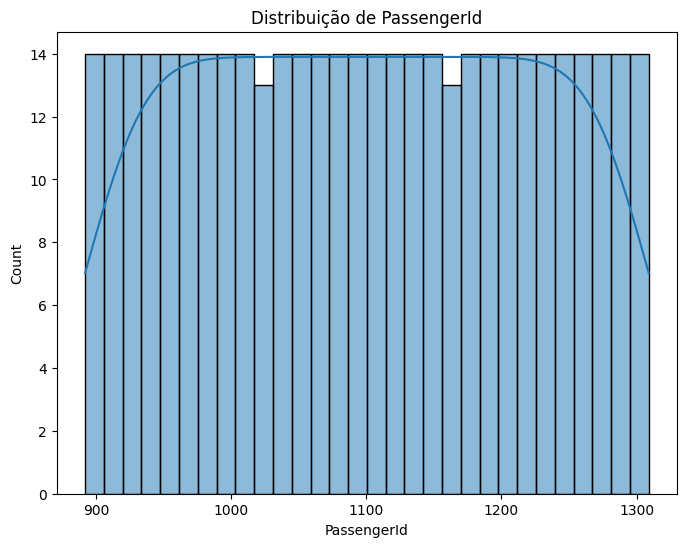

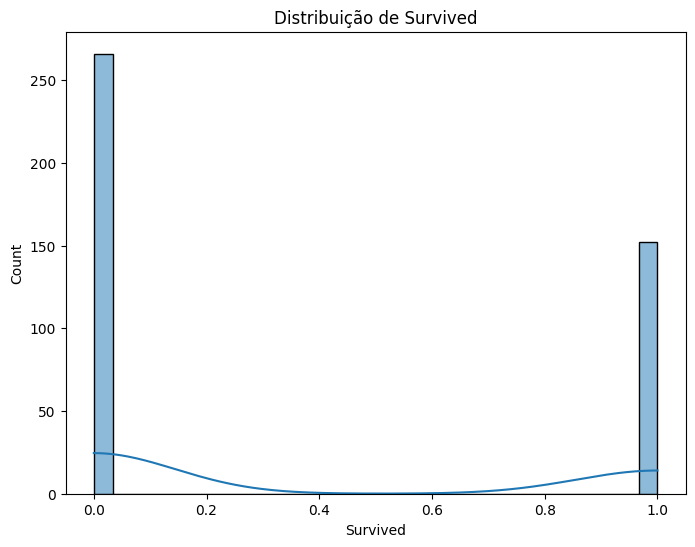

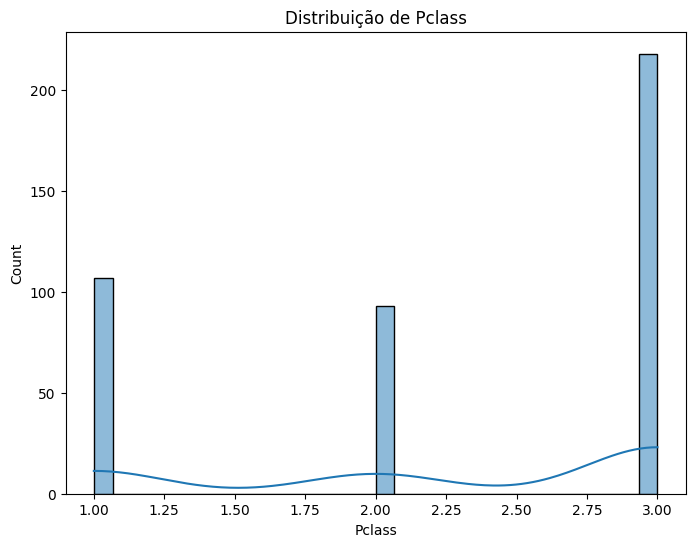

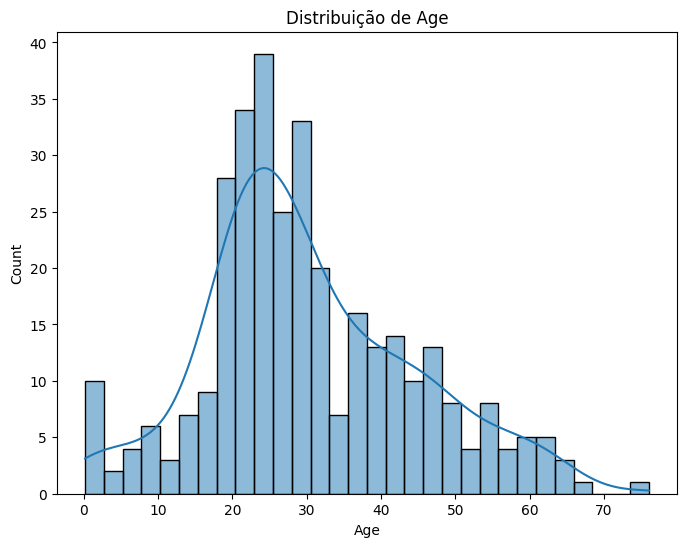

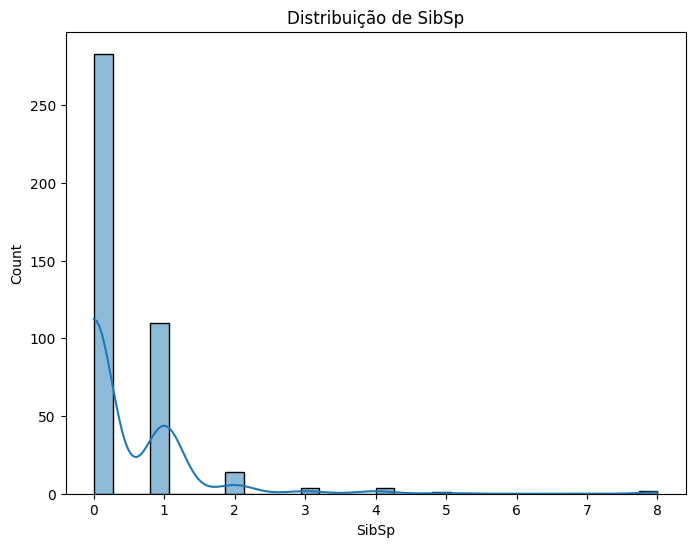

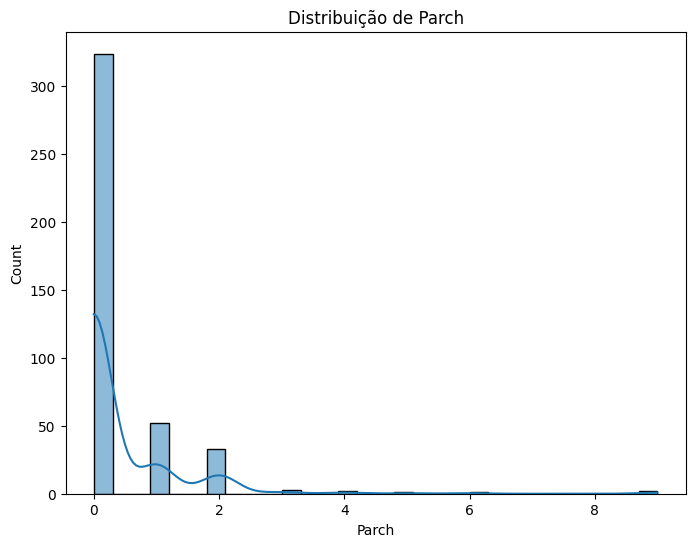

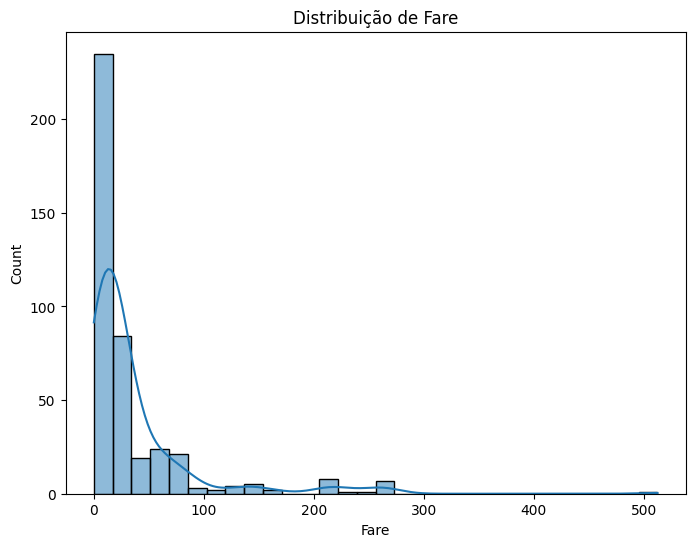

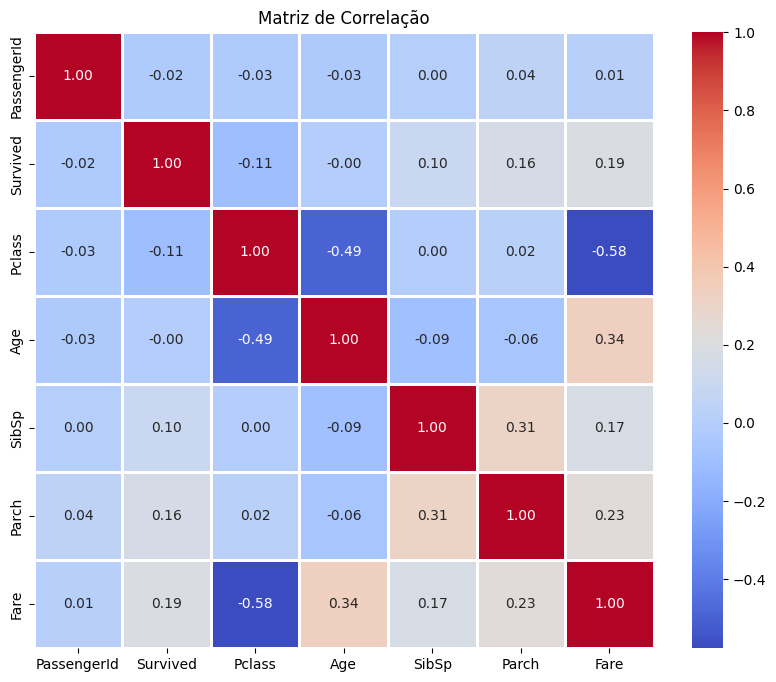


Dados duplicados:
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []

Outliers detectados:
     PassengerId  Survived  Pclass    Age  SibSp  Parch   Fare
0          False     False   False  False  False  False  False
1          False     False   False  False  False  False  False
2          False     False   False   True  False  False  False
3          False     False   False  False  False  False  False
4          False     False   False  False  False   True  False
..           ...       ...     ...    ...    ...    ...    ...
413        False     False   False  False  False  False  False
414        False     False   False  False  False  False   True
415        False     False   False  False  False  False  False
416        False     False   False  False  False  False  False
417        False     False   False  False  False   True  False

[418 rows x 7 columns]

Dataset após o pré-processamento:
   PassengerId  

<ipython-input-18-d576d58c4b70>:66: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dt_limpo[col].fillna(dt_limpo[col].mode()[0], inplace=True)


In [18]:
# Atividade Aula 04
# Turma: A

# Lucas Raineri (RA: 1982251): Responsável pela coleta e preparação do dataset, realização da análise exploratória de dados (EDA), tratamento de dados nulos e dados duplicados.

# infos Dataset:

# URL: [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
# Resumo do Dataset: dataset contém informações sobre os passageiros do Titanic.
# Descrição dos Dados:
# PassengerId: Identificador único de cada passageiro.
# Pclass: Classe do passageiro.
# Name: Nome do passageiro.
# Sex: Gênero do passageiro.
# Age: Idade do passageiro.
# SibSp: Número de irmãos ou cônjuges a bordo.
# Parch: Número de pais ou filhos a bordo.
# Fare: Tarifa paga pelo passageiro.
# Embarked: Porto de embarque.
# Survived: Indica se o passageiro sobreviveu.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dt = pd.read_csv("/content/sample_data/tested.csv")

print("\nValores nulos por coluna:")
print(dt.isnull().sum())

print("\nEstatísticas descritivas:")
print(dt.describe())

#variáveis categóricas
colunas_categoricas = dt.select_dtypes(include=['object']).columns
print("\nVariáveis categóricas:")
print(dt[colunas_categoricas].describe())

#variáveis numéricas com gráficos
colunas_numericas = dt.select_dtypes(include=['float64', 'int64']).columns

# verificar se o laço esta correto e se esta montando o grafico direito
for col in colunas_numericas:
    plt.figure(figsize=(8, 6))
    sns.histplot(dt[col], kde=True, bins=30)
    plt.title(f'Distribuição de {col}')
    plt.show()

# Verificar a correlação entre variáveis numéricas
plt.figure(figsize=(10, 8))
sns.heatmap(dt[colunas_numericas].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1)
plt.title('Matriz de Correlação')
plt.show()

# Verificar se existem dados duplicados
dados_duplicados = dt[dt.duplicated()]
print("\nDados duplicados:")
print(dados_duplicados)

dt_limpo = dt.drop_duplicates()

dt_limpo[colunas_numericas] = dt_limpo[colunas_numericas].fillna(dt_limpo[colunas_numericas].mean())

#valores ausentes preencher com o valor mais comum
for col in colunas_categoricas:
    dt_limpo[col].fillna(dt_limpo[col].mode()[0], inplace=True)

# Transformação de variáveis categóricas usando One-Hot Encoding
dt_limpo = pd.get_dummies(dt_limpo, columns=colunas_categoricas, drop_first=True)

#tratamento de outliers
Q1 = dt_limpo[colunas_numericas].quantile(0.25)
Q3 = dt_limpo[colunas_numericas].quantile(0.75)
IQR = Q3 - Q1

#outliers
outliers = ((dt_limpo[colunas_numericas] < (Q1 - 1.5 * IQR)) | (dt_limpo[colunas_numericas] > (Q3 + 1.5 * IQR)))
print("\nOutliers detectados:")
print(outliers)

dt_limpo_sem_outliers = dt_limpo[~outliers.any(axis=1)]

# Visualizar o dataset limpo
print("\nDataset após o pré-processamento:")
print(dt_limpo_sem_outliers.head())
